<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/cancer__cell_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CANCER CELL -  classify cells to whether the samples are benign or malignant.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pylab as pl


## LOADING THE DATA FROM CSV FILE .

In [ ]:
pip install requests


In [ ]:
import requests

def download(url, filename):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for 4xx and 5xx HTTP status codes
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"File downloaded as {filename}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

# Usage example:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
download(path, "cell_samples.csv")


File downloaded as cell_samples.csv


In [ ]:
df = pd.read_csv("cell_samples.csv")
df.head(20)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

  




### ID -patients identifier.
### we will take the factors in consideration from clump to mit.{values from 0 -10}

### TARGET - CLASS : it contains 2 values


*   benign value = 2
*   malifgnant value = 4



##**lets visualize the data based on the clump and unif size**

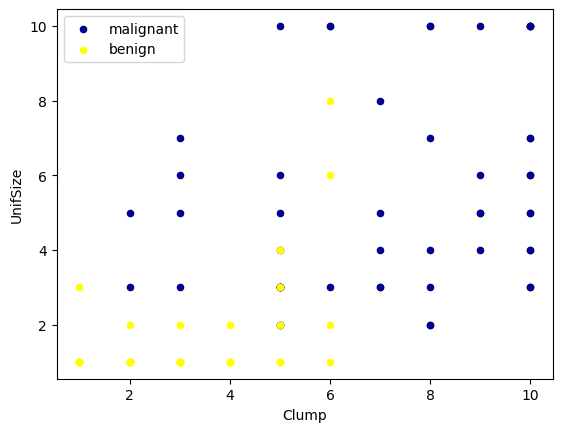

In [ ]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

# PRE PROCESS THE DATA :  format --> lets check whether all the data is in the same format or not. i.e the data is in the same data type or not

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

### here **BareNuc** is in the string type lets type cast the data.

In [ ]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce').notnull() # changing the type
df['BareNuc'] = df['BareNuc'].astype('int') # specifing which type the data is to be changed.
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [26]:
x = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df[['Class']]
x

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,1,3,2,1
2,3,1,1,1,2,1,3,1,1
3,6,8,8,1,3,1,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,1,8,10,2
697,4,8,6,4,3,1,10,6,1


## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


x_std = scaler.fit_transform(x)

y_std = scaler.fit_transform(y)


## normalization of data .

In [24]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


x_normalized = scaler.fit_transform(x_std)
y_normalized = scaler.fit_transform(y_std)


### Test /train the data.

In [25]:
X_train, X_test, y_train, y_test = train_test_split( x_normalized,y_normalized , test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (559, 9) (559, 1)
Test set: (140, 9) (140, 1)


# Modeling (SVM with Scikit-learn)

here we perform **kernelling** . which is mainly used to map data into higher dimenssion space . for that we use somr mathematical functions that functions are called as **kernel function**.
There are different typer of kernel function :


1.   Linear
2.   Polynomial
3.   Radial basis function (RBF)
4.   Sigmoid

we can take any of these four. lets take RBF





In [28]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### lets predict the data

In [29]:
yhat = model.predict(X_test)
yhat [0:5]

array([1., 0., 0., 1., 0.])

# EVALUATION :

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        88
         1.0       0.98      0.92      0.95        52

    accuracy                           0.96       140
   macro avg       0.97      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion matrix, without normalization
[[87  1]
 [ 4 48]]


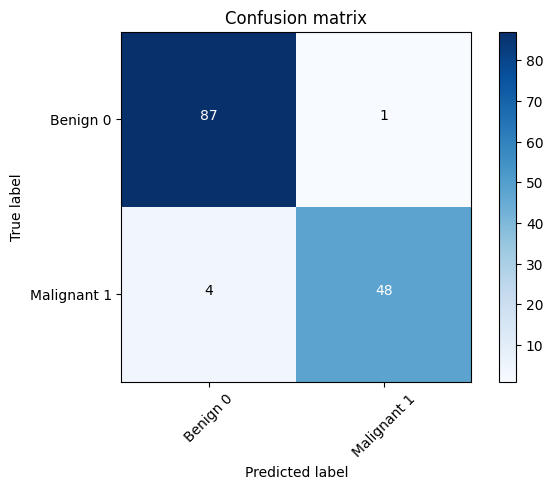

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming y_test contains labels 0 and 1, and yhat contains 0 and 1 predictions
# Compute confusion matrix for mapped predictions
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

# Print classification report
print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign 0', 'Malignant 1'], normalize=False, title='Confusion matrix')
plt.show()


In [34]:
print(np.unique(y_test))


[0. 1.]


#lets find the f1 - score.   
f1 score is mainly used to check the imbalance . manchi datao kadho chepthundhii.
konni sarlu accuracy bane vasthadhi kani new value prediction crt ga radhu .
so aalanti cases lo f1 score thakkuva untadhi
.

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9640545858257016

# lets check for the Accuaracy : using jaccard_score.

The jaccard_score function in scikit-learn expects the pos_label parameter to be one of the unique labels present in your y_test and yhat arrays. In your case, it seems that your labels are 0 and 1.

You should use one of the actual labels, either 0 or 1, as the pos_label parameter

In [39]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9456521739130435